In [1]:
import matplotlib as mpl 
import matplotlib.colors as mcolors
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import numpy as np


iSampleRate = 2000  # 采样频率
colors=list(mcolors.TABLEAU_COLORS.keys()) #颜色变化
font1={'family':'Times New Roman',
       'weight': 'normal',
       'size':30,
}
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30

In [9]:
def action_seg(data, channel, endlabel):
    actionList = []  # 存储动作
    tag = []  # 记录标签
    begin = 0
    for aim in range(len(data) - 1):
        # 控制手势停止时间
        if (data.iloc[aim, channel] ==endlabel+1):
            break;
        if (data.iloc[aim, channel] != data.iloc[aim + 1, channel]):
            tag.append(aim)
            end = aim
            actionList.append(data[begin:end])
            begin = end + 1
    return actionList

def uniform(actionList, channel):
    for action in actionList:
        iemg = action.iloc[:, :channel].copy()
        scaler = preprocessing.StandardScaler()
        BNemg = scaler.fit_transform(iemg)
        action = action.copy(False)
        action.iloc[:, :channel] = BNemg

    return actionList

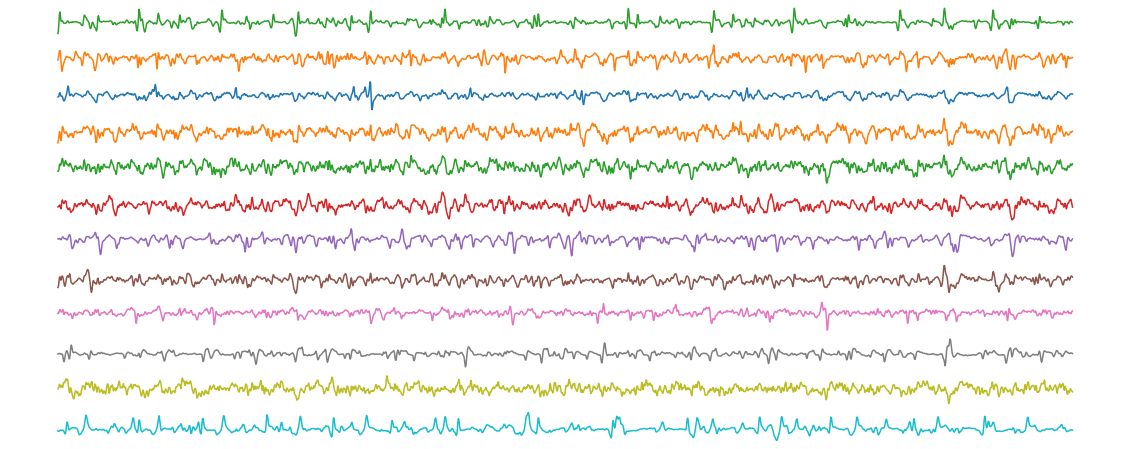

In [16]:
if __name__ == '__main__':
    for j in range(1, 2):
        df = pd.read_hdf('F:/DB2/raw/DB2_s' + str(j) + 'raw.h5', 'df')
        '''滑动窗口分割'''
        actionList = action_seg(df, 12, 1)
        unList = uniform(actionList, 12)
        iemg = unList[1].values
        iemg = iemg[:,:12]
        iSampleCount = iemg.shape[0]  # 采样数
        plt.figure(figsize=(20,8))
        t = np.linspace(0, iSampleCount / iSampleRate, iSampleCount)
        for i in range(12):
            plt.subplot(12,1,i+1)
            plt.plot(iemg[10000:12000,i],color=mcolors.TABLEAU_COLORS[colors[int(math.fabs(i-2))]])
            plt.axis('off')
        plt.show()